In [ ]:
import matplotlib.pyplot as plt

class Environment:
    class Hunter:
        def __init__(self, height, width):
            self.height = height
            self.width = width

        def initialize_state(self):
            # state = np.random.rand(2)
            # environment = np.array([self.width, self.height])
            # state = state * environment
            random1 = (np.random.rand() * 2 - 1) / 2
            random2 = (np.random.rand() * 2 - 1) / 2
            random3 = (np.random.rand() * 2 - 1) / 2
            hunter_state1 = np.array([0, random3])
            hunter_state2 = np.array([0, (1 + random2) * self.height])
            hunter_state3 = np.array([0, (-1 + random3) * self.height])
            return hunter_state1, hunter_state2, hunter_state3

    class Prey:
        def __init__(self, height, width):
            self.height = height
            self.width = width
            self.moving_average = 0.0
            self.move_counts = 0

        def initialize_state(self):
            state = np.array([1, 0])
            environment = np.array([self.width, self.height / 2])
            state = state * environment
            return state

        def move_away_from_hunters(self, prey_state, hunter_state1, hunter_state2, hunter_state3):
            hunters_g = (hunter_state1 + hunter_state2 + hunter_state3) / 3
            g_to_prey_state_vector = prey_state - hunters_g
            g_to_prey_state_vector_norm = g_to_prey_state_vector / np.linalg.norm(g_to_prey_state_vector)
            new_prey_state = prey_state + g_to_prey_state_vector_norm * 0.3

            # new_prey_state = prey_state + np.array([0.3, 0])

            # new_prey_state = prey_state
            return new_prey_state

    def __init__(self):
        # self.done = False
        self.max_episode_steps = 10
        self.reward_for_no_match = -0.5
        self.reward_for_distance = -0.2
        self.reward_for_catch = 2
        self.reward_for_caging = 0.2
        # self.area_threshold = 0.05
        self.distance_threshold = 3.0
        self.prey = self.Prey(4,4)
        self.hunter = self.Hunter(2,2)

        self.hunter_state1 = None
        self.hunter_state2 = None
        self.hunter_state3 = None
        self.prey_state = None

        self.initialize_state()

    def initialize_state(self):
        self.hunter_state1, self.hunter_state2, self.hunter_state3 = self.hunter.initialize_state()
        self.prey_state = self.prey.initialize_state()

        return self.hunter_state1, self.hunter_state2, self.hunter_state3, self.prey_state

    def sigmoid(self, x):
        return np.exp(x) / (np.exp(x) + 1)

    def step(self, action1, action2, action3):
        done = False

        original_hunter1_vector_from_prey = self.hunter_state1 - self.prey_state
        original_hunter2_vector_from_prey = self.hunter_state2 - self.prey_state
        original_hunter3_vector_from_prey = self.hunter_state3 - self.prey_state

        original_hunter1_distance_from_prey = np.linalg.norm(original_hunter1_vector_from_prey)
        original_hunter2_distance_from_prey = np.linalg.norm(original_hunter2_vector_from_prey)
        original_hunter3_distance_from_prey = np.linalg.norm(original_hunter3_vector_from_prey)

        self.prey_state = self.prey.move_away_from_hunters(self.prey_state, self.hunter_state1, self.hunter_state2, self.hunter_state3)
        action1 = action1 / np.linalg.norm(action1)
        action2 = action2 / np.linalg.norm(action2)
        action3 = action3 / np.linalg.norm(action3)

        self.hunter_state1 = self.hunter_state1 + action1
        self.hunter_state2 = self.hunter_state2 + action2
        self.hunter_state3 = self.hunter_state3 + action3

        # self.hunter_state1 = self.hunter_state1 + np.array([self.sigmoid(action1[0]) * np.cos(2 * np.pi * self.sigmoid(action1[1])), self.sigmoid(action1[0]) * np.sin(2 * np.pi * self.sigmoid(action1[1]))])
        # self.hunter_state2 = self.hunter_state2 + np.array([self.sigmoid(action2[0]) * np.cos(2 * np.pi * self.sigmoid(action2[1])), self.sigmoid(action2[0]) * np.sin(2 * np.pi * self.sigmoid(action2[1]))])
        # self.hunter_state3 = self.hunter_state3 + np.array([self.sigmoid(action3[0]) * np.cos(2 * np.pi * self.sigmoid(action3[1])), self.sigmoid(action3[0]) * np.sin(2 * np.pi * self.sigmoid(action3[1]))])
        # self.hunter_state1 = self.hunter_state1 + np.array([self.sigmoid(action1[0]) * np.cos(self.sigmoid(action1[1])), self.sigmoid(action1[0]) * np.sin(self.sigmoid(action1[1]))])
        # self.hunter_state2 = self.hunter_state2 + np.array([self.sigmoid(action2[0]) * np.cos(self.sigmoid(action2[1])), self.sigmoid(action2[0]) * np.sin(self.sigmoid(action2[1]))])
        # self.hunter_state3 = self.hunter_state3 + np.array([self.sigmoid(action3[0]) * np.cos(self.sigmoid(action3[1])), self.sigmoid(action3[0]) * np.sin(self.sigmoid(action3[1]))])

        hunter2_vector_from_hunter1 = self.hunter_state2 - self.hunter_state1
        hunter3_vector_from_hunter1 = self.hunter_state3 - self.hunter_state1

        hunter1_vector_from_prey = self.hunter_state1 - self.prey_state
        hunter2_vector_from_prey = self.hunter_state2 - self.prey_state
        hunter3_vector_from_prey = self.hunter_state3 - self.prey_state

        hunter1_distance_from_prey = np.linalg.norm(hunter1_vector_from_prey)
        hunter2_distance_from_prey = np.linalg.norm(hunter2_vector_from_prey)
        hunter3_distance_from_prey = np.linalg.norm(hunter3_vector_from_prey)

        cross_h1_h2_h3 = np.cross(hunter2_vector_from_hunter1, hunter3_vector_from_hunter1)
        cross_p_h1_h2 = np.cross(hunter1_vector_from_prey, hunter2_vector_from_prey)
        cross_p_h2_h3 = np.cross(hunter2_vector_from_prey, hunter3_vector_from_prey)
        cross_p_h3_h1 = np.cross(hunter3_vector_from_prey, hunter1_vector_from_prey)

        area_h1_h2_h3 = abs(cross_h1_h2_h3) / 2
        area_p_h1_h2 = abs(cross_p_h1_h2) / 2
        area_p_h2_h3 = abs(cross_p_h2_h3) / 2
        area_p_h3_h1 = abs(cross_p_h3_h1) / 2

        sum_area_of_ps = area_p_h1_h2 + area_p_h2_h3 + area_p_h3_h1

        # print(self.prey_state, self.hunter_state1, self.hunter_state2, self.hunter_state3)
        # plt.plot(self.prey_state[0], self.prey_state[1], 'r', marker='o')
        # plt.plot(self.hunter_state1[0], self.hunter_state1[1], 'b',marker='o')
        # plt.plot(self.hunter_state2[0], self.hunter_state2[1], 'b', marker='o')
        # plt.plot(self.hunter_state3[0], self.hunter_state3[1], 'b', marker='o')
        # plt.show()
        # print(cross_h1_h2_h3, cross_p_h1_h2, cross_p_h2_h3, cross_p_h3_h1)

        # reward1 = self.reward_for_no_match
        # reward2 = self.reward_for_no_match
        # reward3 = self.reward_for_no_match

        # if (hunter1_distance_from_prey < self.distance_threshold):
        #   reward1 = self.reward_for_distance

        # if (hunter2_distance_from_prey < self.distance_threshold):
        #   reward2 = self.reward_for_distance

        # if (hunter3_distance_from_prey < self.distance_threshold):
        #   reward3 = self.reward_for_distance

        reward1 = -0.3 - (hunter1_distance_from_prey - original_hunter1_distance_from_prey) * 0.2
        reward2 = -0.3 - (hunter2_distance_from_prey - original_hunter2_distance_from_prey) * 0.2
        reward3 = -0.3 - (hunter3_distance_from_prey - original_hunter3_distance_from_prey) * 0.2

        # if (original_hunter1_distance_from_prey > hunter1_distance_from_prey):
        #   reward1 = -0.2
        # else:
        #   reward1 = -0.5

        # if (original_hunter2_distance_from_prey > hunter2_distance_from_prey):
        #   reward2 = -0.2
        # else:
        #   reward2 = -0.5

        # if (original_hunter3_distance_from_prey > hunter3_distance_from_prey):
        #   reward3 = -0.2
        # else:
        #   reward3 = -0.5

        # if (sum_area_of_ps == area_h1_h2_h3):
        #   reward1 = reward1 / 2
        #   reward2 = reward2 / 2
        #   reward3 = reward3 / 2
        #   print('Close!', reward1, reward2, reward3)

        if (hunter1_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold and sum_area_of_ps == area_h1_h2_h3):
          reward1 = self.reward_for_catch
          reward2 = self.reward_for_catch
          reward3 = self.reward_for_catch
          print('Caught!')
          done = True


        # if (hunter1_distance_from_prey < self.distance_threshold or hunter2_distance_from_prey < self.distance_threshold or hunter3_distance_from_prey < self.distance_threshold):
        #   reward = self.reward2
        #   if ((hunter1_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold) or (hunter2_distance_from_prey < self.distance_threshold and hunter3_distance_from_prey < self.distance_threshold) or (hunter3_distance_from_prey < self.distance_threshold and hunter1_distance_from_prey < self.distance_threshold)):
        #     reward = self.reward3
        #     if (hunter1_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold):
        #       reward = self.reward4
        #       if (sum_area_of_ps == area_h1_h2_h3):
        #         reward = self.reward5
        #         done = True

        # print(reward, hunter1_distance_from_prey, hunter2_distance_from_prey, hunter3_distance_from_prey)

        # if (sum_area_of_ps == area_h1_h2_h3):
        #     if(area_h1_h2_h3 < self.area_threshold):
        #       reward = self.reward1
        #       done = True
        #     else:
        #       reward = self.reward2
        # else:
        #     reward = self.reward3
            # print(sum_area_of_ps == area_h1_h2_h3, sum_area_of_ps, area_h1_h2_h3)
        return self.prey_state, self.hunter_state1, self.hunter_state2, self.hunter_state3, reward1, reward2, reward3, done

In [ ]:
# prey_state = np.array([2.455675, 1.122334])
# hunter_state1 = np.array([0.00123, 0.0000312])
# hunter_state2 = np.array([3.99878, 0.00122])
# hunter_state3 = np.array([4.22342, 3.556674])

# hunter2_vector_from_hunter1 = hunter_state2 - hunter_state1
# hunter3_vector_from_hunter1 = hunter_state3 - hunter_state1

# hunter1_vector_from_prey = hunter_state1 - prey_state
# hunter2_vector_from_prey = hunter_state2 - prey_state
# hunter3_vector_from_prey = hunter_state3 - prey_state

# cross_h1_h2_h3 = np.cross(hunter2_vector_from_hunter1, hunter3_vector_from_hunter1)
# cross_p_h1_h2 = np.cross(hunter1_vector_from_prey, hunter2_vector_from_prey)
# cross_p_h2_h3 = np.cross(hunter2_vector_from_prey, hunter3_vector_from_prey)
# cross_p_h3_h1 = np.cross(hunter3_vector_from_prey, hunter1_vector_from_prey)

# area_h1_h2_h3 = np.linalg.norm(cross_h1_h2_h3) /2
# area_p_h1_h2 = np.linalg.norm(cross_p_h1_h2) /2
# area_p_h2_h3 = np.linalg.norm(cross_p_h2_h3) /2
# area_p_h3_h1 = np.linalg.norm(cross_p_h3_h1) /2

# print(area_h1_h2_h3,
#       area_p_h1_h2,
#       area_p_h2_h3,
#       area_p_h3_h1)

# sum_area_of_ps = area_p_h1_h2 + area_p_h2_h3 + area_p_h3_h1
# sum_area_of_ps == area_h1_h2_h3

In [ ]:
from torch import nn

def reparameterize(means, log_stds):
    stds = log_stds.exp()
    noises = torch.randn_like(means)
    us = means + noises * stds
    actions = torch.tanh(us)
    log_pis = calculate_log_pi(log_stds, noises, actions)
    return actions, log_pis

def calculate_log_pi(log_stds, noises, actions):
    gaussian_log_probs = (-0.5 * noises.pow(2) - log_stds).sum(dim=-1, keepdim=True) - 0.5* math.log(2 * math.pi) * log_stds.size(-1)
    log_pis = gaussian_log_probs - torch.log(1 - actions.pow(2) + 1e-6).sum(dim=-1, keepdim=True)
    return log_pis

class SACActor(nn.Module):
    def __init__(self, state_shape, action_shape):
        super().__init__()

        self.net=nn.Sequential(
            nn.Linear(state_shape[0] * state_shape[1], 512),
            nn.ReLU(inplace=True),
            nn.Linear(512,256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 2 * action_shape[0])
        )

    def forward(self, states):
        # print('Actor forwarding')
        states = torch.reshape(states, (-1,6))
        states = torch.flatten(states)
        # print('net:')
        # print(self.net(states))
        # print('actor net done')
        net = torch.tanh(self.net(states).chunk(2, dim=-1)[0])
        # print(net)
        # print(net.shape)
        return net
        # return self.net(states)

    def sample(self, states):
        # print(states.shape)
        states = torch.reshape(states, (-1,6))
        # print(states.shape)
        # means, log_stds = self.net(states).chunk(2,dim=-1)
        # print(self.net(states))
        # means, log_stds = self.net(states)
        means, log_stds = self.net(states).chunk(2, dim=-1)
        # print('done means')
        return reparameterize(means, log_stds.clamp_(-20,2))

class SACCritic(nn.Module):
    def __init__(self, state_shape, action_shape):
        super().__init__()

        self.net1 = nn.Sequential(
            nn.Linear((state_shape[0] + 1) * state_shape[1], 512),
            nn.ReLU(inplace=True),
            nn.Linear(512,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,1)
        )

        self.net2 = nn.Sequential(
            nn.Linear((state_shape[0] + 1) * state_shape[1], 512),
            nn.ReLU(inplace=True),
            nn.Linear(512,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,1)
        )

    def forward(self, states, actions):
        actions = torch.reshape(actions, (512,1,2))
        # print(actions)
        # print(states)
        x = torch.cat([states, actions], 1)
        # print(x)
        x = torch.reshape(x, (-1,8))
        # x = torch.flatten(x)
        # print(x)
        net1, net2 = self.net1(x), self.net2(x)
        net1, net2 = torch.reshape(net1, (-1,)), torch.reshape(net2, (-1,))
        # print('Critic net done')
        return net1, net2

In [ ]:
class ReplayBuffer:
    def __init__(self, buffer_size, state_shape, action_shape, device):
        self._p = 0
        self._n = 0
        self.buffer_size = buffer_size

        self.states = torch.empty((buffer_size, *state_shape), dtype=torch.float, device=device)
        self.actions = torch.empty((buffer_size, *action_shape), dtype=torch.float, device=device)
        self.rewards = torch.empty((buffer_size, 1), dtype=torch.float, device=device)
        self.dones = torch.empty((buffer_size, 1), dtype=torch.float, device=device)
        self.next_states = torch.empty((buffer_size, *state_shape), dtype=torch.float, device=device)

    def append(self, state, action, reward, done, next_state):
        # print(self.states[0], state)
        self.states[self._p].copy_(torch.from_numpy(state))
        self.actions[self._p].copy_(torch.from_numpy(action))
        self.rewards[self._p] = float(reward)
        self.dones[self._p] = float(done)
        self.next_states[self._p].copy_(torch.from_numpy(next_state))

        self._p = (self._p + 1) % self.buffer_size
        self._n = min(self._n + 1, self.buffer_size)

    def sample(self, batch_size):
        idxes = np.random.randint(low=0, high=self._n, size=batch_size)
        return(
            self.states[idxes],
            self.actions[idxes],
            self.rewards[idxes],
            self.dones[idxes],
            self.next_states[idxes]
        )

In [ ]:
from abc import ABC, abstractmethod

class Algorithm(ABC):
    def explore(self, state, actor):
        state = torch.tensor(state, dtype=torch.float, device=self.device).unsqueeze_(0)
        with torch.no_grad():
            action, log_pi = actor.sample(state)
        action = action.cpu().numpy()[0]
        action = action / np.linalg.norm(action)
        return action, log_pi.item()

    def exploit(self, state, actor):
        state = torch.tensor(state, dtype=torch.float, device=self.device).unsqueeze_(0)
        # print('exploit')
        # print(state)
        with torch.no_grad():
            action = actor(state)
        action = action.cpu().numpy()
        action = action / np.linalg.norm(action)
        return action

In [ ]:
import math, torch
import numpy as np

env = Environment()

class SAC(Algorithm):
    def __init__(self, state_shape, action_shape, device=torch.device('cuda'), seed=0, batch_size=512, gamma=0.99, lr_actor=3e-4, lr_critic=3e-4, replay_size=10**4, start_steps=2 * 10**5, tau=5e-3, alpha=0.2, reward_scale=1.0):
        super().__init__()

        np.random.seed(seed)
        torch.manual_seed(seed)

        self.buffer1 = ReplayBuffer(
            buffer_size=replay_size,
            state_shape=state_shape,
            action_shape=action_shape,
            device=device
        )

        self.buffer2 = ReplayBuffer(
            buffer_size=replay_size,
            state_shape=state_shape,
            action_shape=action_shape,
            device=device
        )

        self.buffer3 = ReplayBuffer(
            buffer_size=replay_size,
            state_shape=state_shape,
            action_shape=action_shape,
            device=device
        )

        self.actor1 = SACActor(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)

        self.critic1 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)

        self.critic_target1 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device).eval()

        self.actor2 = SACActor(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)

        self.critic2 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)

        self.critic_target2 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device).eval()

        self.actor3 = SACActor(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)

        self.critic3 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)

        self.critic_target3 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device).eval()

        self.critic_target1.load_state_dict(self.critic1.state_dict())
        for param in self.critic_target1.parameters():
            param.requires_grad = False

        self.critic_target2.load_state_dict(self.critic2.state_dict())
        for param in self.critic_target2.parameters():
            param.requires_grad = False

        self.critic_target3.load_state_dict(self.critic3.state_dict())
        for param in self.critic_target3.parameters():
            param.requires_grad = False

        self.optim_actor1 = torch.optim.Adam(self.actor1.parameters(), lr=lr_actor)
        self.optim_actor2 = torch.optim.Adam(self.actor2.parameters(), lr=lr_actor)
        self.optim_actor3 = torch.optim.Adam(self.actor3.parameters(), lr=lr_actor)

        self.optim_critic1 = torch.optim.Adam(self.critic1.parameters(), lr=lr_critic)
        self.optim_critic2 = torch.optim.Adam(self.critic2.parameters(), lr=lr_critic)
        self.optim_critic3 = torch.optim.Adam(self.critic3.parameters(), lr=lr_critic)

        self.learning_steps = 0
        self.batch_size = batch_size
        self.device = device
        self.gamma = gamma
        self.start_steps = start_steps
        self.tau = tau
        self.alpha = alpha
        self.reward_scale = reward_scale

    def is_update(self, steps):
        return steps >= max(self.start_steps, self.batch_size)

    def step(self, env, hunter_state1, hunter_state2, hunter_state3, t, steps):
        t += 1

        original_prey_state = env.prey_state

        relative_hunter_state1_from_prey = hunter_state1 - original_prey_state
        relative_hunter_state2_from_prey = hunter_state2 - original_prey_state
        relative_hunter_state3_from_prey = hunter_state3 - original_prey_state

        relative_hunter_state1_from_hunter2 = hunter_state1 - hunter_state2
        relative_hunter_state1_from_hunter3 = hunter_state1 - hunter_state3

        relative_hunter_state2_from_hunter3 = hunter_state2 - hunter_state3
        relative_hunter_state2_from_hunter1 = hunter_state2 - hunter_state1

        relative_hunter_state3_from_hunter1 = hunter_state3 - hunter_state1
        relative_hunter_state3_from_hunter2 = hunter_state3 - hunter_state2

        hunter_state1_matrix = np.stack([relative_hunter_state1_from_prey, relative_hunter_state1_from_hunter2, relative_hunter_state1_from_hunter3])
        hunter_state2_matrix = np.stack([relative_hunter_state2_from_prey, relative_hunter_state2_from_hunter3, relative_hunter_state2_from_hunter1])
        hunter_state3_matrix = np.stack([relative_hunter_state3_from_prey, relative_hunter_state3_from_hunter1, relative_hunter_state3_from_hunter2])

        if steps <= self.start_steps:
            # r = np.random.randn(3)
            # theta = 2 * np.pi * np.random.randn(3)
            # action = np.array([r * np.cos(theta), r * np.sin(theta)])
            # action = action.T
            action = np.random.rand(3,2)
            norm = np.linalg.norm(action, axis=1)
            action = action / norm[:,None]
            action_1 = action[0]
            action_2 = action[1]
            action_3 = action[2]
        else:
            action_1,_ = self.explore(hunter_state1_matrix, self.actor1)
            action_2,_ = self.explore(hunter_state2_matrix, self.actor2)
            action_3,_ = self.explore(hunter_state3_matrix, self.actor3)

        # action = np.random.rand(3,2)
        # norm = np.linalg.norm(action, axis=1)
        # action = action / norm[:,None]
        # action_1 = action[0]
        # action_2 = action[1]
        # action_3 = action[2]

        next_prey_state, next_hunter_state1, next_hunter_state2, next_hunter_state3, reward1, reward2, reward3, done = env.step(action_1, action_2, action_3)

        relative_next_hunter_state1_from_prey = next_hunter_state1 - next_prey_state
        relative_next_hunter_state2_from_prey = next_hunter_state2 - next_prey_state
        relative_next_hunter_state3_from_prey = next_hunter_state3 - next_prey_state

        relative_next_hunter_state1_from_hunter2 = next_hunter_state1 - next_hunter_state2
        relative_next_hunter_state1_from_hunter3 = next_hunter_state1 - next_hunter_state3

        relative_next_hunter_state2_from_hunter3 = next_hunter_state2 - next_hunter_state3
        relative_next_hunter_state2_from_hunter1 = next_hunter_state2 - next_hunter_state1

        relative_next_hunter_state3_from_hunter1 = next_hunter_state3 - next_hunter_state1
        relative_next_hunter_state3_from_hunter2 = next_hunter_state3 - next_hunter_state2

        next_hunter_state1_matrix = np.stack([relative_next_hunter_state1_from_prey, relative_next_hunter_state1_from_hunter2, relative_next_hunter_state1_from_hunter3])
        next_hunter_state2_matrix = np.stack([relative_next_hunter_state2_from_prey, relative_next_hunter_state2_from_hunter3, relative_next_hunter_state2_from_hunter1])
        next_hunter_state3_matrix = np.stack([relative_next_hunter_state3_from_prey, relative_next_hunter_state3_from_hunter1, relative_next_hunter_state3_from_hunter2])

        if t == env.max_episode_steps:
            done_masked = False
        else:
            done_masked = done

        self.buffer1.append(hunter_state1_matrix, action_1, reward1, done_masked, next_hunter_state1_matrix)
        self.buffer2.append(hunter_state2_matrix, action_2, reward2, done_masked, next_hunter_state2_matrix)
        self.buffer3.append(hunter_state3_matrix, action_3, reward3, done_masked, next_hunter_state3_matrix)

        if done:
            t = 0
            next_hunter_state1, next_hunter_state2, next_hunter_state3, next_prey_state = env.initialize_state()

        return next_hunter_state1, next_hunter_state2, next_hunter_state3, next_prey_state, t

    def update(self):
        self.learning_steps += 1

        relative_hunter_states1_matrix, actions1, rewards1, dones1, relative_next_hunter_states1_matrix = self.buffer1.sample(self.batch_size)
        relative_hunter_states2_matrix, actions2, rewards2, dones2, relative_next_hunter_states2_matrix = self.buffer2.sample(self.batch_size)
        relative_hunter_states3_matrix, actions3, rewards3, dones3, relative_next_hunter_states3_matrix = self.buffer3.sample(self.batch_size)

        self.update_critic(relative_hunter_states1_matrix, actions1, rewards1, dones1, relative_next_hunter_states1_matrix, self.critic1, self.actor1, self.critic_target1, self.optim_critic1)
        self.update_critic(relative_hunter_states2_matrix, actions2, rewards2, dones2, relative_next_hunter_states2_matrix, self.critic2, self.actor2, self.critic_target2, self.optim_critic2)
        self.update_critic(relative_hunter_states3_matrix, actions3, rewards3, dones3, relative_next_hunter_states3_matrix, self.critic3, self.actor3, self.critic_target3, self.optim_critic3)

        self.update_actor(relative_hunter_states1_matrix, self.critic1, self.actor1, self.optim_actor1)
        self.update_actor(relative_hunter_states2_matrix, self.critic2, self.actor2, self.optim_actor2)
        self.update_actor(relative_hunter_states3_matrix, self.critic3, self.actor3, self.optim_actor3)
        self.update_target()

    def update_critic(self, states, actions, rewards, dones, next_states, critic, actor, critic_target, optim_critic):
        curr_qs1, curr_qs2 = critic(states, actions)
        # print('done critic')

        with torch.no_grad():
            next_actions, log_pis = actor.sample(next_states)
            # print('got samples')
            next_qs1, next_qs2 = critic_target(next_states, next_actions)
            next_qs = torch.min(next_qs1, next_qs2) - self.alpha * log_pis
        target_qs = rewards * self.reward_scale + (1.0 - dones) * self.gamma * next_qs

        loss_critic1 = (curr_qs1 - target_qs).pow_(2).mean()
        loss_critic2 = (curr_qs2 - target_qs).pow_(2).mean()

        optim_critic.zero_grad()
        (loss_critic1 + loss_critic2).backward(retain_graph=False)
        optim_critic.step()

    def update_actor(self, states, critic, actor, optim_actor):
        # print('Updating actor')
        actions, log_pis = actor.sample(states)
        qs1, qs2 = critic(states, actions)
        loss_actor = (self.alpha * log_pis - torch.min(qs1, qs2)).mean()

        optim_actor.zero_grad()
        loss_actor.backward(retain_graph=False)
        optim_actor.step()

    def update_target(self):
        for t, s in zip(self.critic_target1.parameters(), self.critic1.parameters()):
            t.data.mul_(1.0 - self.tau)
            t.data.add_(self.tau * s.data)

        for t, s in zip(self.critic_target2.parameters(), self.critic2.parameters()):
            t.data.mul_(1.0 - self.tau)
            t.data.add_(self.tau * s.data)

        for t, s in zip(self.critic_target3.parameters(), self.critic3.parameters()):
            t.data.mul_(1.0 - self.tau)
            t.data.add_(self.tau * s.data)

In [ ]:
import matplotlib.pyplot as plt
from time import time
from datetime import timedelta

class Trainer:
    def __init__(self, env, env_test, algo, seed=0, num_steps=10**6, eval_interval=10**4, num_eval_episodes=3):
        self.env = env
        self.env_test = env_test
        self.algo = algo

        # self.env.seed(seed)
        # self.env_test.seed(2**32 - seed)

        self.returns = {'step': [], 'return': []}

        self.num_steps = num_steps
        self.eval_interval = eval_interval
        self.num_eval_episodes = num_eval_episodes
        self.prey_state = env.prey_state

    def train(self):
        self.start_time = time()

        t = 0

        hunter_state1, hunter_state2, hunter_state3, prey_state = self.env.initialize_state()

        for steps in range(1, self.num_steps + 1):
          hunter_state1, hunter_state2, hunter_state3, prey_state, t = self.algo.step(self.env, hunter_state1, hunter_state2, hunter_state3, t, steps)

          if(self.algo.is_update(steps)):
              self.algo.update()

          if(steps % self.eval_interval == 0):
              self.evaluate(steps)

          if(steps % env.max_episode_steps == 0):
              hunter_state1, hunter_state2, hunter_state3, prey_state = self.env.initialize_state()

          if(steps % 1000 == 0):
              print(steps)

    def evaluate(self, steps):
        returns = []

        for _ in range(self.num_eval_episodes):
            hunter_state1, hunter_state2, hunter_state3, prey_state = self.env_test.initialize_state()
            done = False
            episode_return = 0.0
            i = 0
            print('New loop ')
            plt.plot(prey_state[0], prey_state[1], 'r', marker='$S$')
            plt.plot(hunter_state1[0], hunter_state1[1], 'dimgrey', marker='$S$')
            plt.plot(hunter_state2[0], hunter_state2[1], 'darkgrey', marker='$S$')
            plt.plot(hunter_state3[0], hunter_state3[1], 'lightgrey', marker='$S$')

            while(not done):
                original_prey_state = prey_state
                relative_hunter_state1_from_prey = hunter_state1 - original_prey_state
                relative_hunter_state2_from_prey = hunter_state2 - original_prey_state
                relative_hunter_state3_from_prey = hunter_state3 - original_prey_state

                relative_hunter_state1_from_hunter2 = hunter_state1 - hunter_state2
                relative_hunter_state1_from_hunter3 = hunter_state1 - hunter_state3

                relative_hunter_state2_from_hunter3 = hunter_state2 - hunter_state3
                relative_hunter_state2_from_hunter1 = hunter_state2 - hunter_state1

                relative_hunter_state3_from_hunter1 = hunter_state3 - hunter_state1
                relative_hunter_state3_from_hunter2 = hunter_state3 - hunter_state2

                hunter_state1_matrix = np.stack([relative_hunter_state1_from_prey, relative_hunter_state1_from_hunter2, relative_hunter_state1_from_hunter3])
                hunter_state2_matrix = np.stack([relative_hunter_state2_from_prey, relative_hunter_state2_from_hunter3, relative_hunter_state2_from_hunter1])
                hunter_state3_matrix = np.stack([relative_hunter_state3_from_prey, relative_hunter_state3_from_hunter1, relative_hunter_state3_from_hunter2])

                if(i == env.max_episode_steps):
                  break
                i += 1
                action_hunter1 = self.algo.exploit(hunter_state1_matrix, self.algo.actor1)
                action_hunter2 = self.algo.exploit(hunter_state2_matrix, self.algo.actor2)
                action_hunter3 = self.algo.exploit(hunter_state3_matrix, self.algo.actor3)
                # action_hunter1,_ = self.algo.explore(hunter_state1_matrix, self.algo.actor1)
                # action_hunter2,_ = self.algo.explore(hunter_state2_matrix, self.algo.actor2)
                # action_hunter3,_ = self.algo.explore(hunter_state3_matrix, self.algo.actor3)
                prey_state, hunter_state1, hunter_state2, hunter_state3, reward1, reward2, reward3, done = self.env_test.step(action_hunter1, action_hunter2, action_hunter3)
                episode_return += reward1 + reward2 + reward3
                # print(reward1, reward2, reward3, done, hunter_state1, hunter_state2, hunter_state3, prey_state)

                plt.plot(prey_state[0], prey_state[1], 'r', marker='$' + str(i) + '$')
                plt.plot(hunter_state1[0], hunter_state1[1], 'dimgrey', marker='$' + str(i) + '$')
                plt.plot(hunter_state2[0], hunter_state2[1], 'darkgrey', marker='$' + str(i) + '$')
                plt.plot(hunter_state3[0], hunter_state3[1], 'lightgrey', marker='$' + str(i) + '$')

            plt.show()
            returns.append(episode_return)

        mean_return = np.mean(returns)
        self.returns['step'].append(steps)
        self.returns['return'].append(mean_return)

        print(f'Num steps: {steps:<6} '
             f'Return: {mean_return:<5.1f} '
             f'Time: {self.time}')

    def visualize(self):
        return

    def plot(self):
        fig = plt.figure(figsize=(8,6))
        plt.plot(self.returns['step'], self.returns['return'])
        plt.xlabel('Steps', fontsize=24)
        plt.ylabel('Return', fontsize=24)
        plt.tick_params(labelsize=18)
        plt.tight_layout()

    def time(self):
      return str(timedelta(seconds=int(time() - self.start_time)))

In [ ]:
SEED = 0
REWARD_SCALE = 1.0
NUM_STEPS =3 * 10 ** 5
EVAL_INTERVAL = 10 ** 4

algo = SAC(
    state_shape=(3,2),
    action_shape=(2,),
    # seed=SEED,
    reward_scale=REWARD_SCALE
)

trainer = Trainer(
    env=Environment(),
    env_test=Environment(),
    algo=algo,
    # seed=SEED,
    num_steps=NUM_STEPS,
    eval_interval=EVAL_INTERVAL
)

1000
2000
3000
4000
5000
6000
7000
8000
9000
New loop 


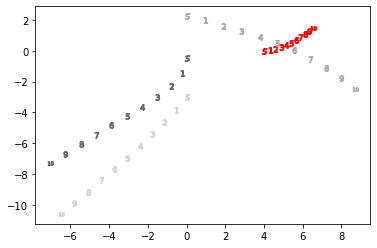

New loop 


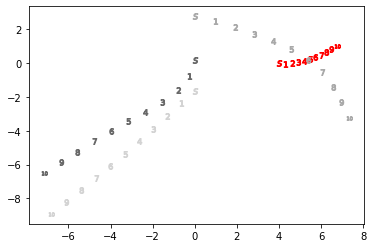

New loop 


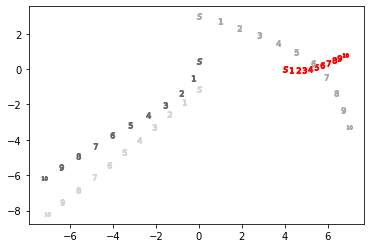

Num steps: 10000  Return: -13.8 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
New loop 


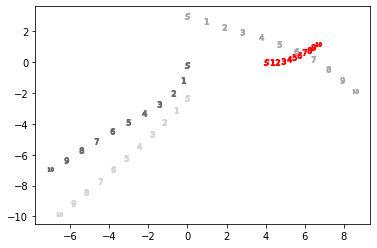

New loop 


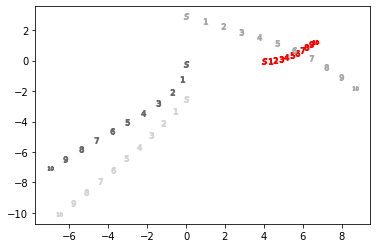

New loop 


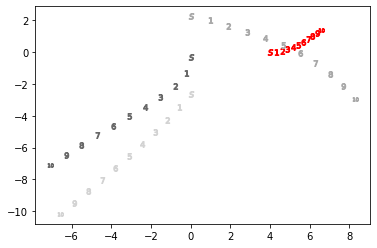

Num steps: 20000  Return: -13.8 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
New loop 


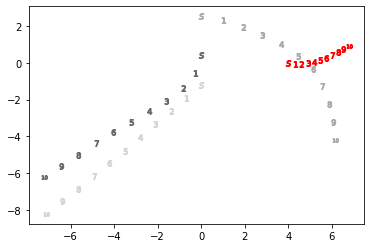

New loop 


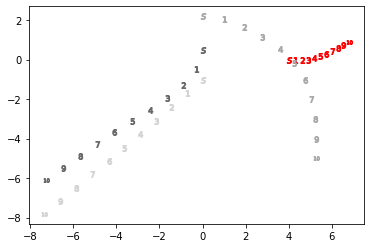

New loop 


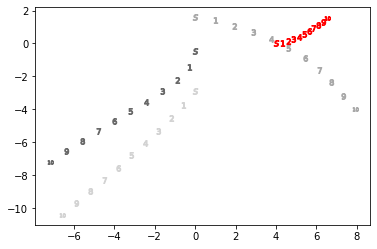

Num steps: 30000  Return: -14.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
New loop 


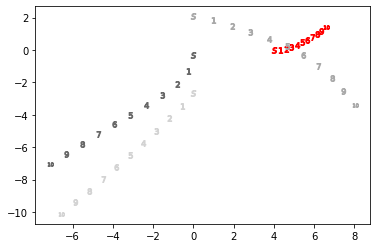

New loop 


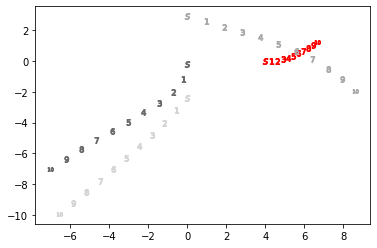

New loop 


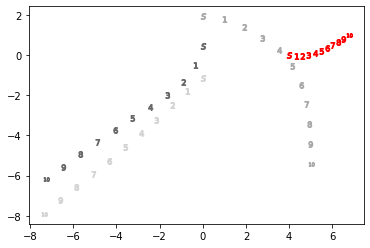

Num steps: 40000  Return: -14.0 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
New loop 


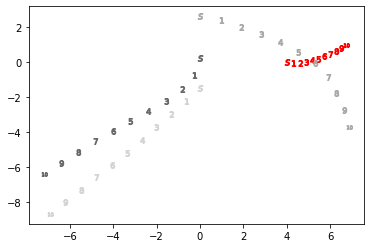

New loop 


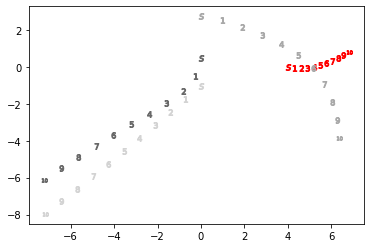

New loop 


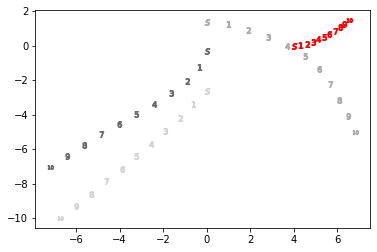

Num steps: 50000  Return: -14.0 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
New loop 


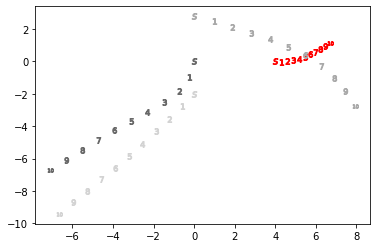

New loop 


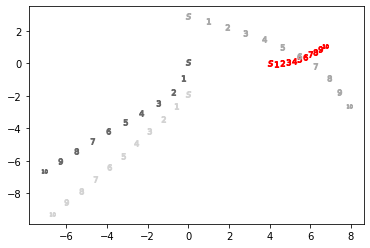

New loop 


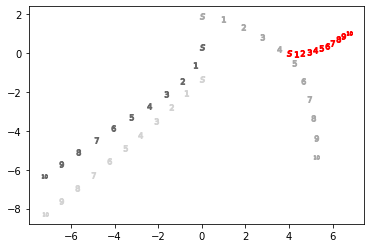

Num steps: 60000  Return: -13.9 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
New loop 


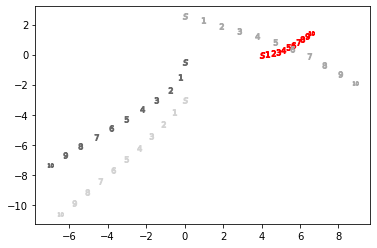

New loop 


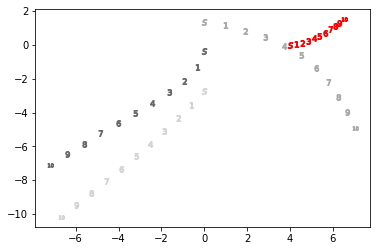

New loop 


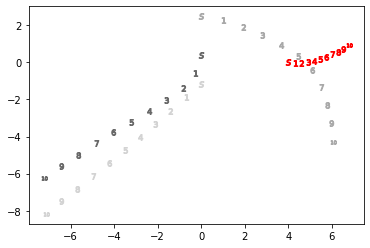

Num steps: 70000  Return: -14.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
New loop 


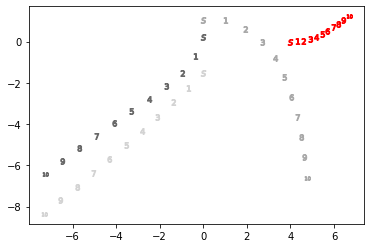

New loop 


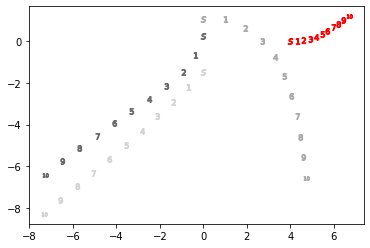

New loop 


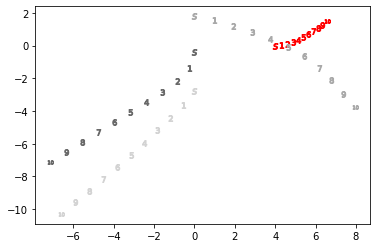

Num steps: 80000  Return: -14.5 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
New loop 


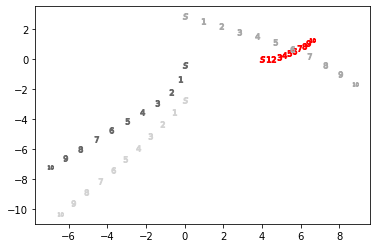

New loop 


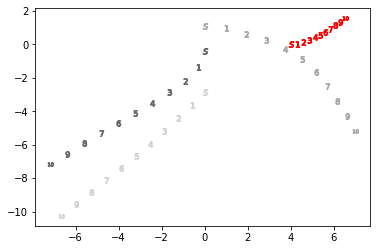

New loop 


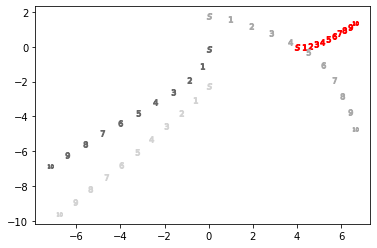

Num steps: 90000  Return: -14.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
New loop 


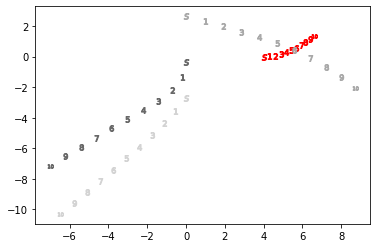

New loop 


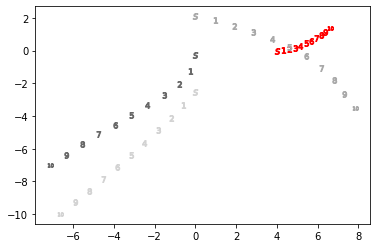

New loop 


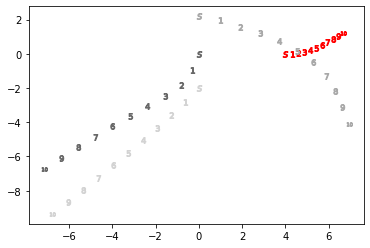

Num steps: 100000 Return: -14.0 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
New loop 


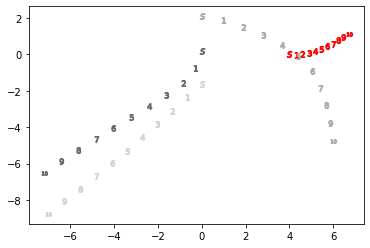

New loop 


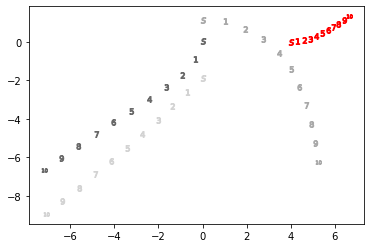

New loop 


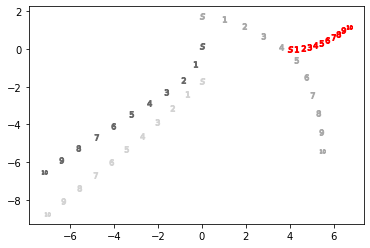

Num steps: 110000 Return: -14.4 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
New loop 


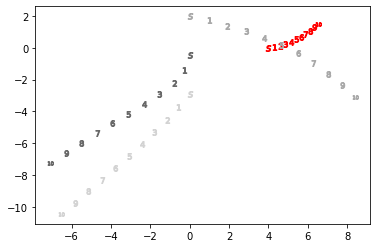

New loop 


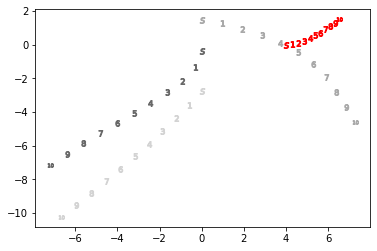

New loop 


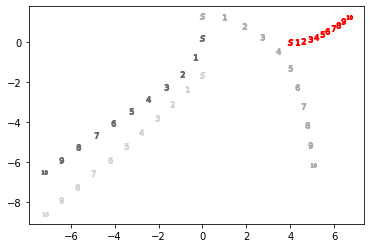

Num steps: 120000 Return: -14.3 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
New loop 


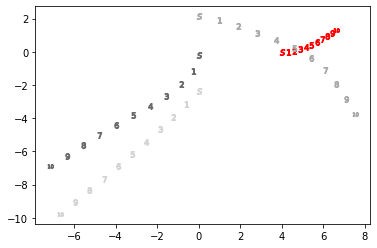

New loop 


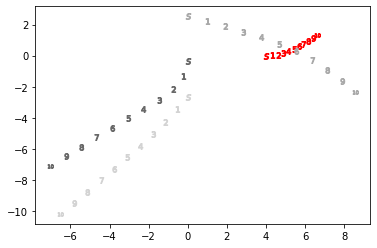

New loop 


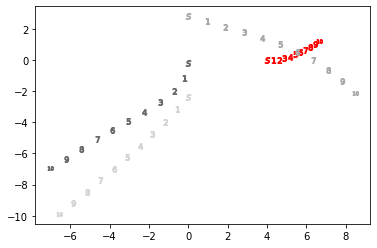

Num steps: 130000 Return: -13.9 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
New loop 


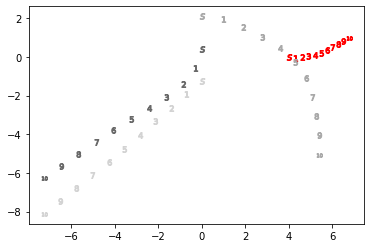

New loop 


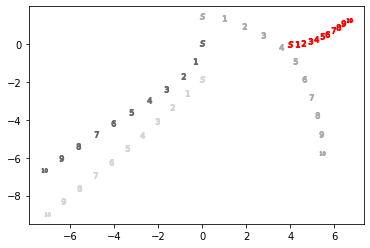

New loop 


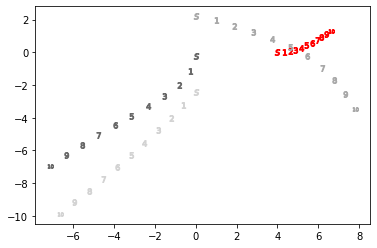

Num steps: 140000 Return: -14.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
New loop 


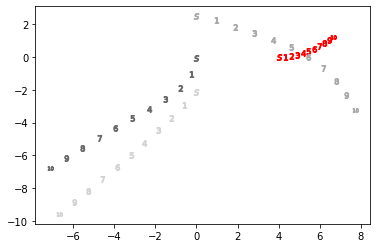

New loop 


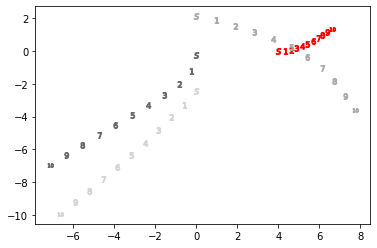

New loop 


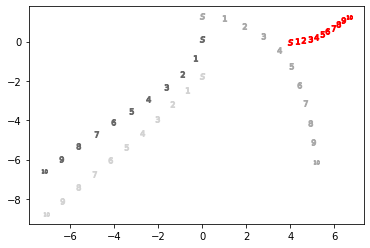

Num steps: 150000 Return: -14.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000
New loop 


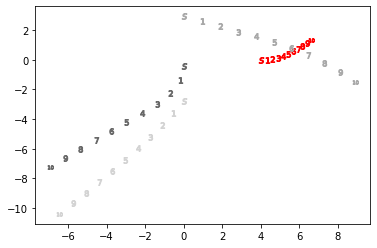

New loop 


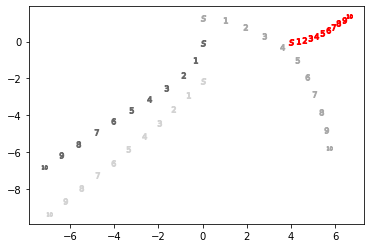

New loop 


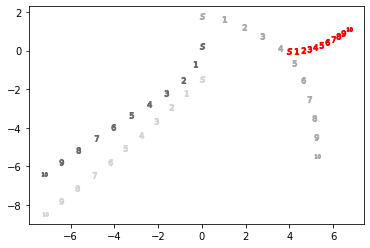

Num steps: 160000 Return: -14.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
160000
161000
162000
163000
164000
165000
166000
167000
168000
169000
New loop 


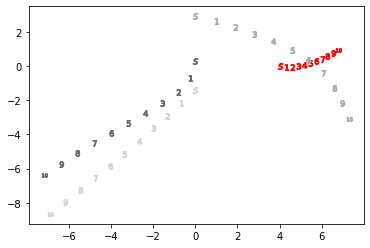

New loop 


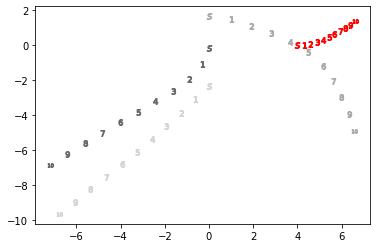

New loop 


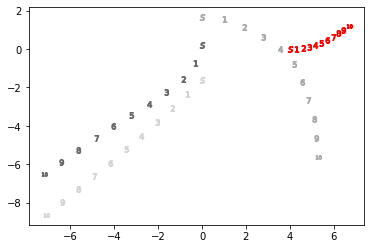

Num steps: 170000 Return: -14.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
170000
171000
172000
173000
174000
175000
176000
177000
178000
179000
New loop 


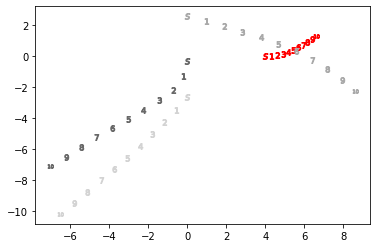

New loop 


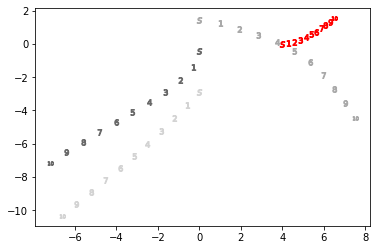

New loop 


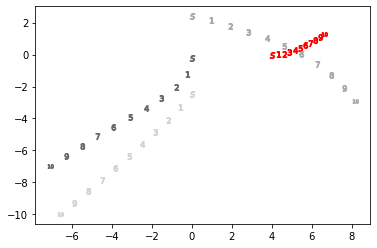

Num steps: 180000 Return: -14.0 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
180000
181000
182000
183000
184000
185000
186000
187000
188000
189000
New loop 


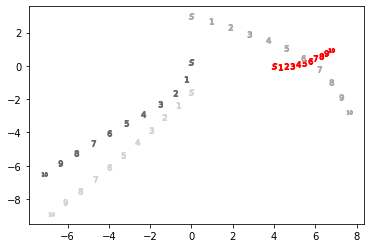

New loop 


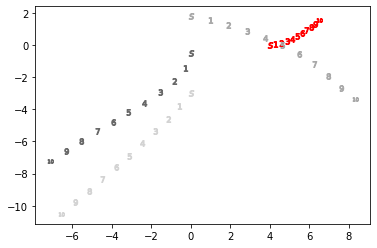

New loop 


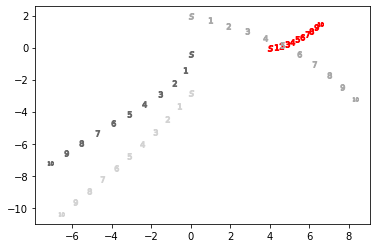

Num steps: 190000 Return: -14.0 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
190000
191000
192000
193000
194000
195000
196000
197000
198000
199000
New loop 


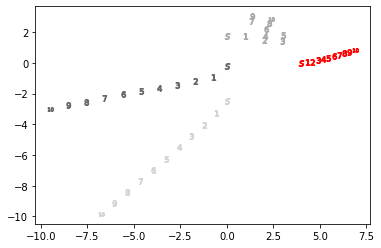

New loop 


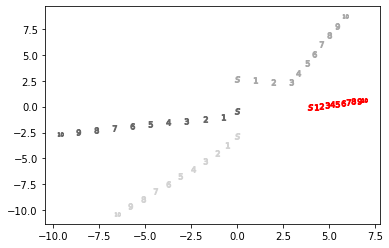

New loop 


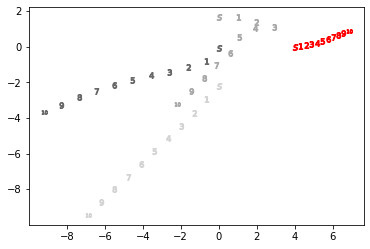

Num steps: 200000 Return: -14.7 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
200000
201000
202000
203000
204000
205000
206000
207000
208000
209000
New loop 


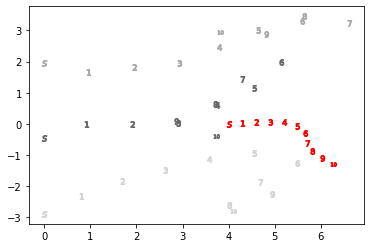

New loop 


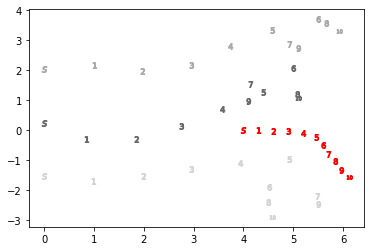

New loop 


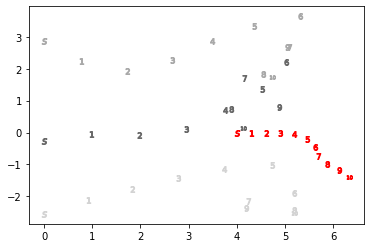

Num steps: 210000 Return: -8.2  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
210000
211000
212000
213000
214000
215000
216000
217000
218000
219000
New loop 


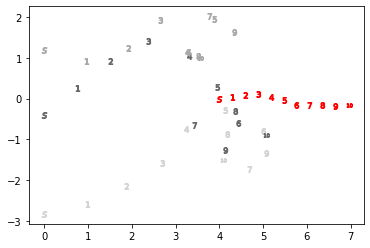

New loop 


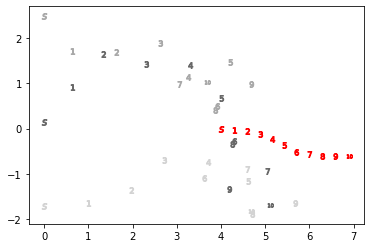

New loop 


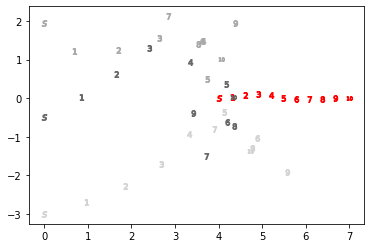

Num steps: 220000 Return: -8.1  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
220000
221000
222000
223000
224000
225000
226000
227000
228000
229000
New loop 


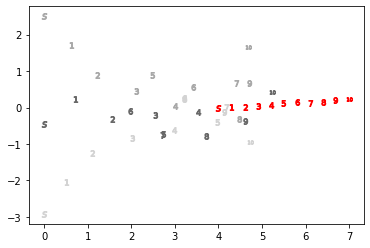

New loop 


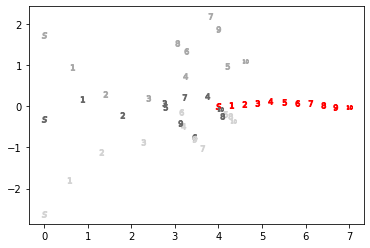

New loop 


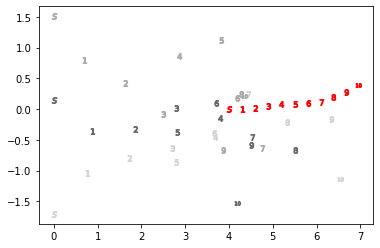

Num steps: 230000 Return: -7.9  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
230000
231000
232000
233000
234000
235000
236000
237000
238000
239000
New loop 


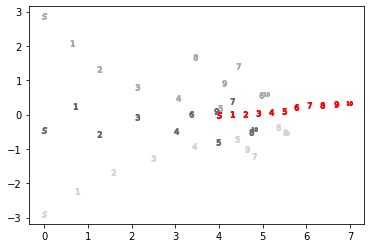

New loop 


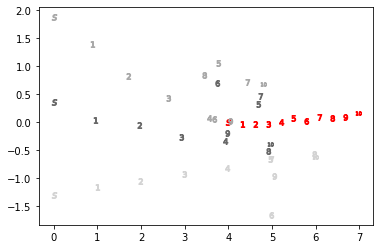

New loop 


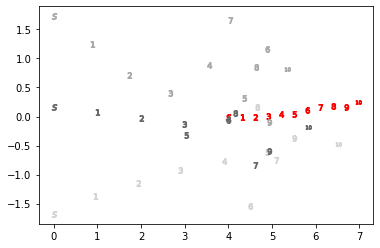

Num steps: 240000 Return: -7.4  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
240000
241000
242000
243000
244000
Caught!
245000
246000
247000
248000
249000
New loop 


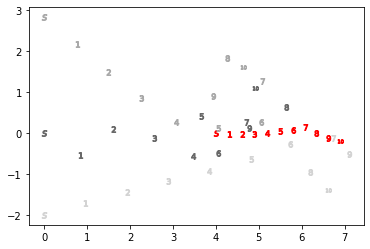

New loop 


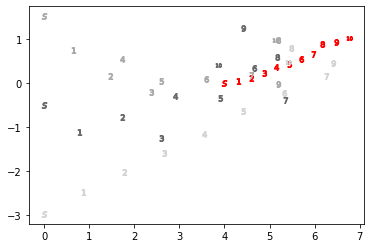

New loop 
Caught!


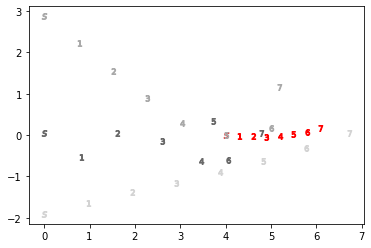

Num steps: 250000 Return: -4.2  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
250000
251000
252000
253000
254000
255000
256000
257000
258000
259000
New loop 
Caught!


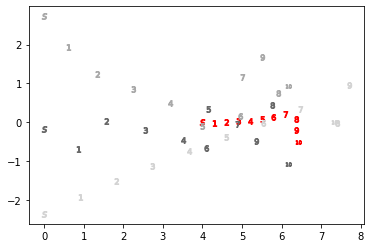

New loop 
Caught!


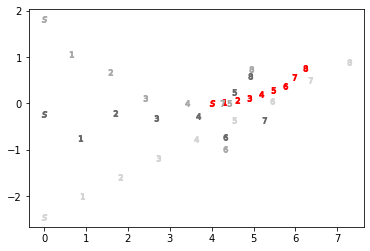

New loop 
Caught!


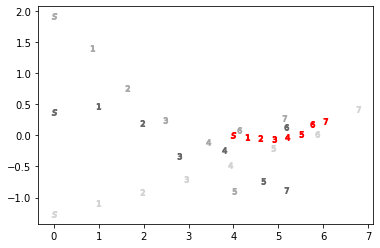

Num steps: 260000 Return: 1.3   Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
260000
261000
262000
263000
264000
265000
266000
267000
268000
269000
New loop 


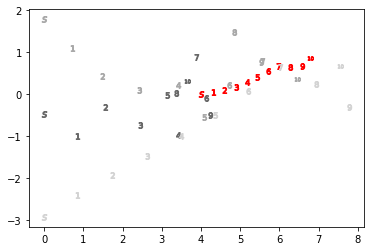

New loop 


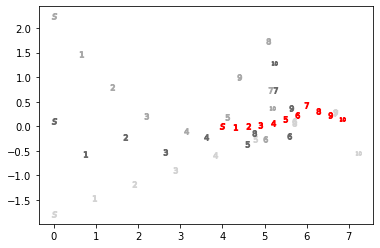

New loop 


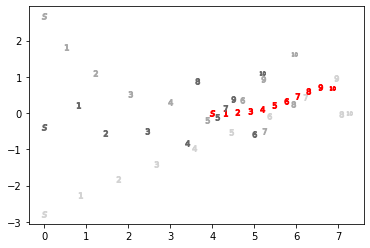

Num steps: 270000 Return: -7.2  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
270000
271000
272000
273000
274000
Caught!
275000
276000
277000
278000
279000
New loop 


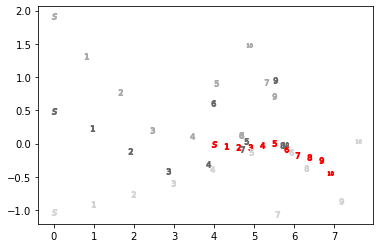

New loop 
Caught!


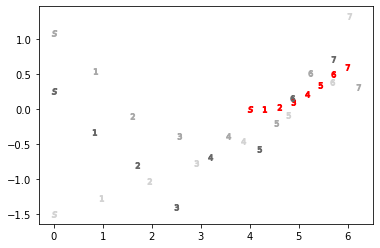

New loop 
Caught!


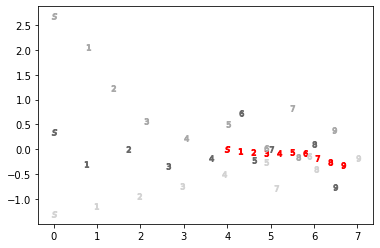

Num steps: 280000 Return: -1.2  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
280000
281000
282000
283000
284000
285000
286000
287000
288000
289000
New loop 
Caught!


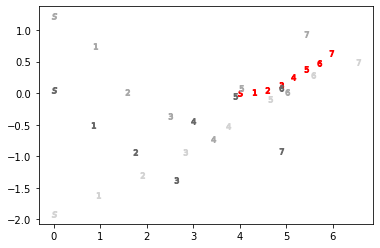

New loop 
Caught!


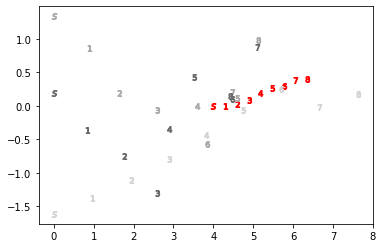

New loop 


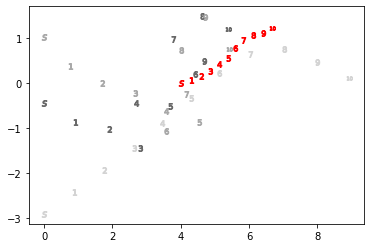

Num steps: 290000 Return: -1.1  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
290000
291000
292000
293000
294000
295000
296000
297000
298000
299000
New loop 


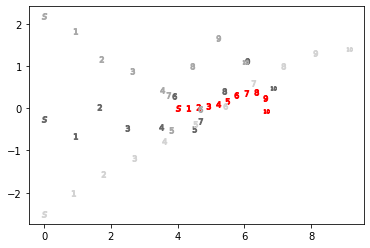

New loop 


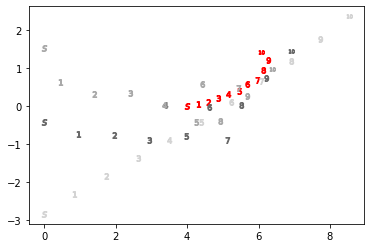

New loop 


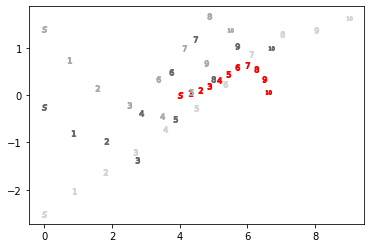

Num steps: 300000 Return: -7.3  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7f4eb103c2b0>>
300000


In [ ]:
trainer.train()

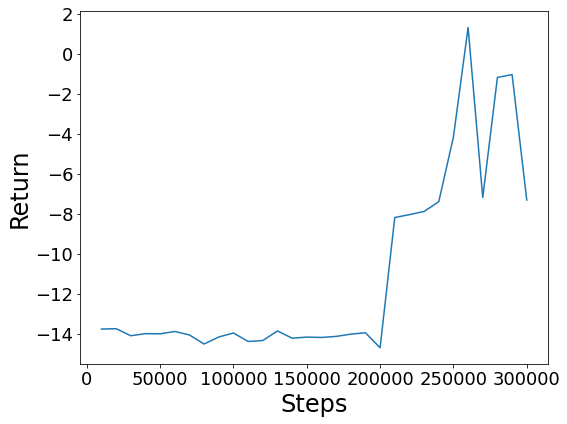

In [ ]:
trainer.plot()

In [ ]:
height_random = np.random.randn() * 2 - 1
width_extent = 0.7
state = np.array([width_extent, height_random])
environment = np.array([2, 2])
state = state * environment
print(state)

[1.4        5.61709246]


In [ ]:
np.random.rand() * 2 - 1

0.2639206743007847